In [49]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, auc, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from itertools import cycle
from sklearn.utils.fixes import signature

# Importing the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [51]:
#check unique data
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [52]:
df.describe(include=['O'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,329-8788,no,no
freq,106,1,3010,2411


In [53]:
# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['state'] = labelencoder.fit_transform(df['state'])
df['international plan'] = labelencoder.fit_transform(df['international plan'])
df['voice mail plan'] = labelencoder.fit_transform(df['voice mail plan'])
df['churn'] = labelencoder.fit_transform(df['churn'])
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [54]:
#data
df.describe()
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


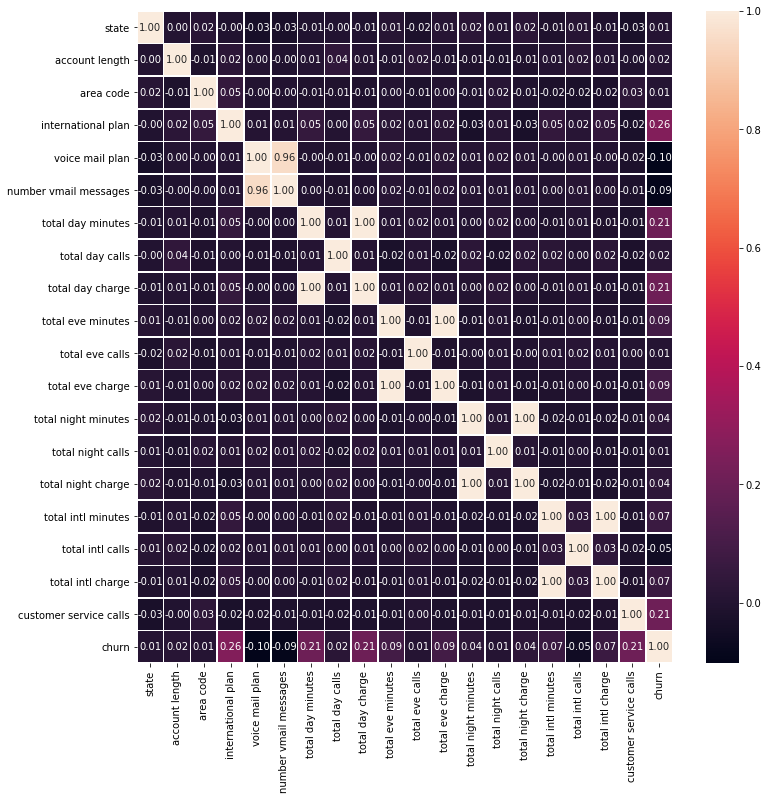

In [55]:
#Correlation heatmap
import seaborn as sns
f,ax= plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=.6,fmt='.2f',ax=ax) #annot=True :Visible numbers 
plt.show() 

In [56]:
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

In [57]:
#confirm RFM
rfmTable = df.groupby('phone number').agg({#'total eve charge':lambda x: x.sum(),
                                          'total calls': lambda x: x.sum(), 
                                          'total charge': lambda x: x.sum()})
rfmTable.rename(columns={#'total eve charge': 'total eve charge',
                         'total calls': 'frequency', 
                         'total charge': 'monetary'}, inplace=True)

rfmTable.head()

,frequency,monetary
phone number,,
327-1058,260,47.42
327-1319,259,54.18
327-3053,342,43.33
327-3587,287,39.65
327-3850,317,60.12


In [58]:
# Create f_score

f_score = []
m_score = []
#r_score = []

columns = ['frequency', 'monetary']
scores_str = ['f_score', 'm_score']
scores = [f_score, m_score]

for n in range(len(columns)):
    # Order by column
    rfmTable = rfmTable.sort_values(columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(1,3334)
    rfmTable['refs'] = refs
    
    # Add score
    for i, row in rfmTable.iterrows():
        if row['refs'] <= 666:
            scores[n].append(5)
        elif row['refs'] > 666 and row['refs'] <= 666*2:
            scores[n].append(4)
        elif row['refs'] > 666*2 and row['refs'] <= 666*3:
            scores[n].append(3)
        elif row['refs'] > 666*3 and row['refs'] <= 666*4:
            scores[n].append(2)
        else: 
            scores[n].append(1)

    # Create f_score column
    rfmTable[scores_str[n]] = scores[n]

rfmTableScores = rfmTable.drop(['frequency', 'monetary', 'refs'], axis=1)

rfmTableScores.head(5)

,f_score,m_score
phone number,,
345-9140,1,5
351-7269,3,5
343-5709,2,5
373-2053,4,5
402-3370,3,5


In [59]:
#from sklearn import preprocessing
    
#X = preprocessing.MinMaxScaler().fit_transform(X)
#X
#we will normalize our data so the prediction on all features will be at the same scale
X = rfmTableScores.iloc[:,[0,1]].values
#from sklearn import preprocessing
    
X_train = preprocessing.MinMaxScaler().fit_transform(X)
#nurmalize the data
#from sklearn.preprocessing import StandardScaler
#X_std = StandardScaler().fit_transform(X)
#dfNorm = pd.DataFrame(X_std, index=rfmTableScores.index, columns=rfmTableScores.columns[0:2])

#X_train = dfNorm.iloc[:,0:2].values
X_train

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.  , 1.  ],
       [0.5 , 1.  ],
       [0.25, 1.  ],
       ...,
       [1.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ]])

In [60]:
#Kmeans k = 1,2,...,11
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

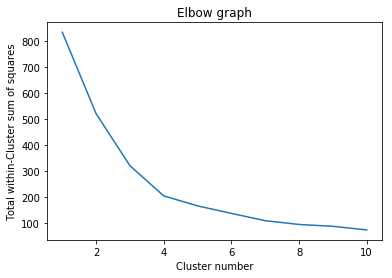

In [61]:
#elbow find k clusters optimal
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('Total within-Cluster sum of squares')
plt.show()


In [62]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X_train)
kmeans_4 = kmeans.inertia_
centroids = kmeans.cluster_centers_
centroids

array([[0.2827907 , 0.78      ],
       [0.74590164, 0.1261034 ],
       [0.88205772, 0.74905897],
       [0.0995509 , 0.19386228]])

In [63]:
kmeans_1 = KMeans(n_clusters=1, init='k-means++', random_state=0)
clusters_1 = kmeans_1.fit_predict(X_train)
kmeans_1 = kmeans_1.inertia_

In [64]:
espsilon = kmeans_4/kmeans_1
Accuracy = 1 - espsilon
print("Accuracy Kmeans: %.2f" %Accuracy)

Accuracy Kmeans: 0.75


In [65]:
#show clusters of object
rfmTable['clusters'] = clusters
rfmTable.head()


,frequency,monetary,refs,f_score,m_score,clusters
phone number,,,,,,
345-9140,245,96.15,1,1,5,0
351-7269,301,92.29,2,3,5,0
343-5709,278,92.20,3,2,5,0
373-2053,326,90.46,4,4,5,2
402-3370,313,90.12,5,3,5,0


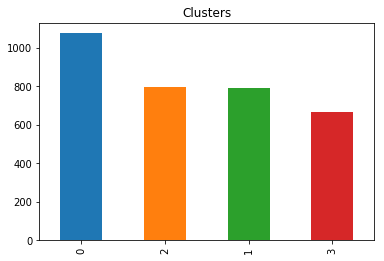

In [66]:
rfmTable["clusters"].value_counts().plot.bar(title= 'Clusters')

Text(0, 0.5, 'Monetary')

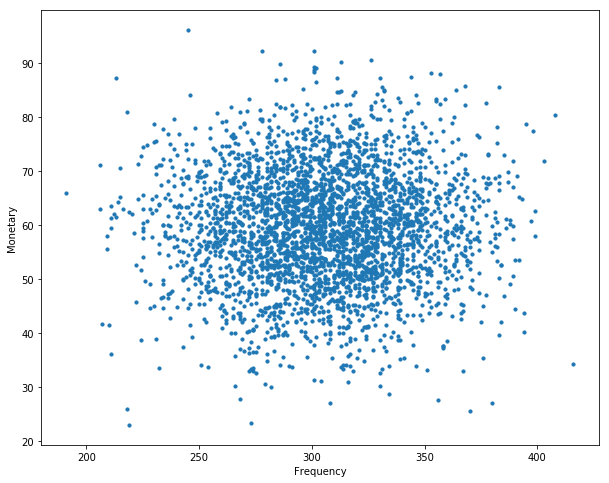

In [67]:
#plot FM in 2D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.scatter(rfmTable.frequency, rfmTable.monetary, s=10)

ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')

Text(0.5, 0, 'Recency')

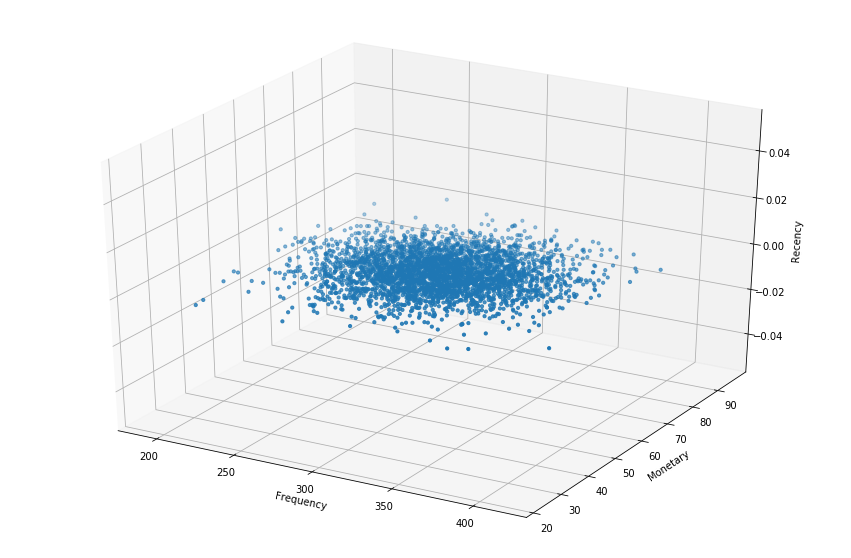

In [68]:
#plot FM in 3D
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfmTable.frequency, rfmTable.monetary, s=10)


ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

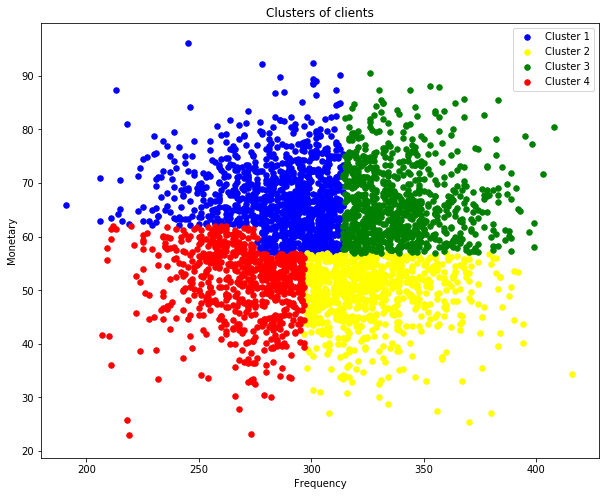

In [69]:
#plot clusters FM in 2D
fig = plt.figure(figsize=(10,8))
dx = fig.add_subplot(111)
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(rfmTable[rfmTable.clusters == i].frequency, 
               rfmTable[rfmTable.clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=30)

dx.set_title('Clusters of clients')
dx.set_xlabel('Frequency')
dx.set_ylabel('Monetary')
dx.legend()

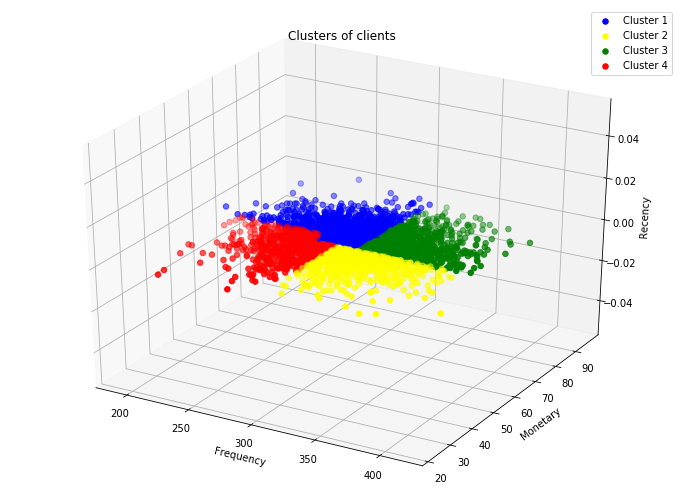

In [70]:
fig = plt.figure(figsize=(12,9))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(rfmTable[rfmTable.clusters == i].frequency, 
               rfmTable[rfmTable.clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=30)

dx.set_title('Clusters of clients')
dx.set_zlabel('Recency')
dx.set_xlabel('Frequency')
dx.set_ylabel('Monetary')
dx.legend()

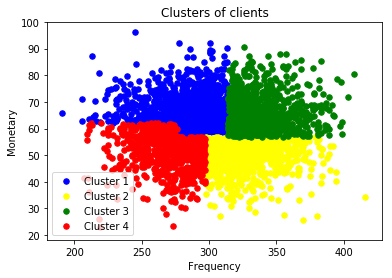

In [71]:
c1 = rfmTable[rfmTable.clusters == 0]
c2 = rfmTable[rfmTable.clusters == 1]
c3 = rfmTable[rfmTable.clusters == 2]
c4 = rfmTable[rfmTable.clusters == 3]

plt.scatter(c1.frequency, c1.monetary, c = 'blue', label = 'Cluster 1',s=30)
plt.scatter(c2.frequency, c2.monetary, c = 'yellow', label = 'Cluster 2',s=30)
plt.scatter(c3.frequency, c3.monetary, c = 'green', label = 'Cluster 3',s=30)
plt.scatter(c4.frequency, c4.monetary, c = 'red', label = 'Cluster 4',s=30)
plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

In [72]:
#Data prepared for the hybrid method of Kmean and ANN
df = pd.merge(df, rfmTable, how='inner', on=['phone number'])
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,customer service calls,churn,total calls,total charge,frequency,monetary,refs,f_score,m_score,clusters
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,1,0,303,75.56,303,75.56,204,3,5,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,1,0,332,59.24,332,59.24,1690,4,3,2


In [73]:
# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.drop(["phone number"],axis = 1, inplace = True)
#df.head(5)

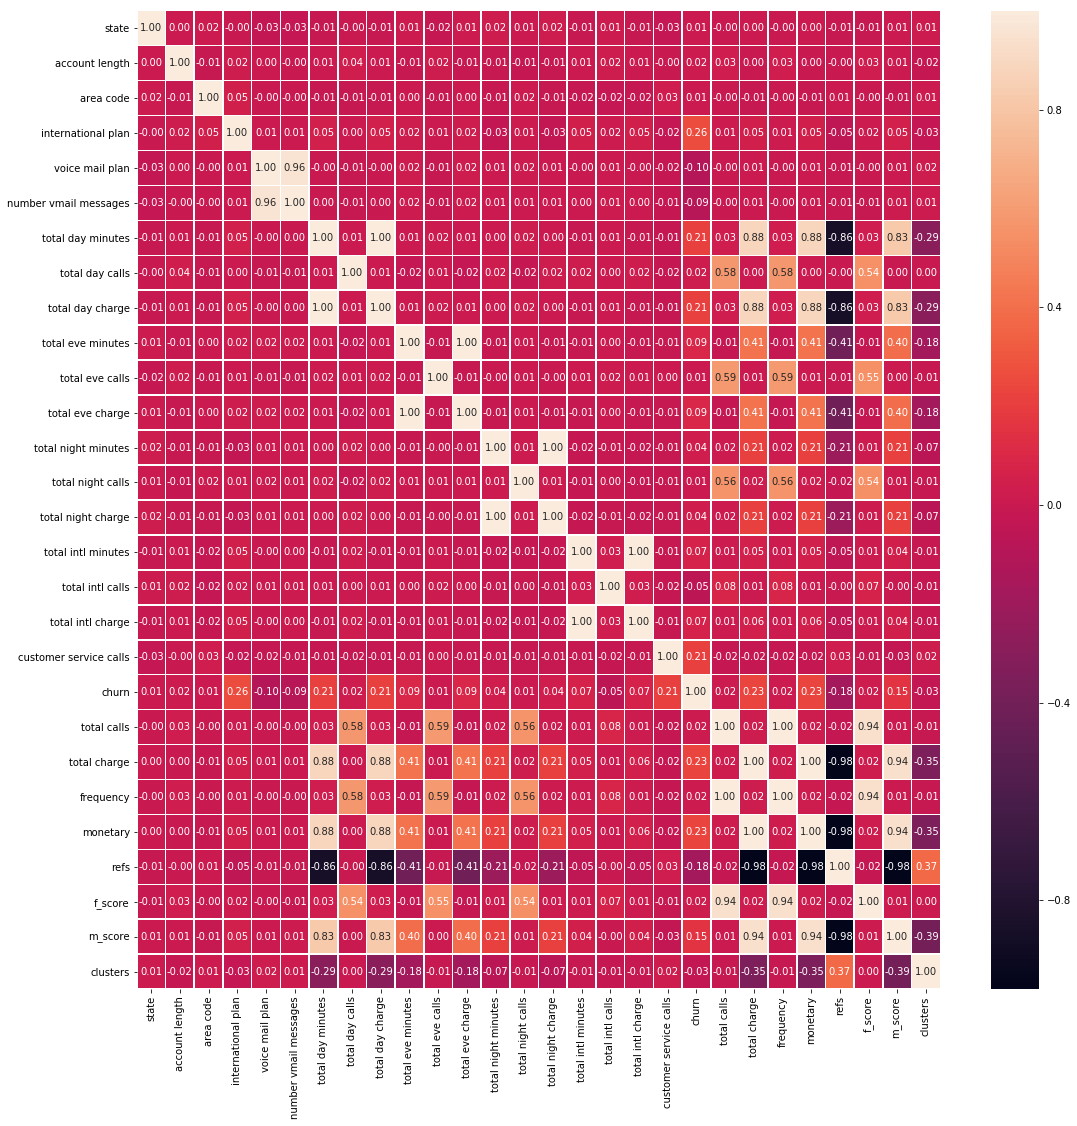

In [74]:
#Correlation heatmap
import seaborn as sns
f,ax= plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,linewidths=.6,fmt='.2f',ax=ax) 
plt.show() 

In [75]:
#Select attributes for training
#X = df.iloc[:,[3,6,8,9,11,12,13,14,15,17,18]].values
X = df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,27]].values
y = df.iloc[:,19].values
X[0]

array([  0.  ,   1.  ,  25.  , 265.1 , 110.  ,  45.07, 197.4 ,  99.  ,
        16.78, 244.7 ,  91.  ,  11.01,  10.  ,   3.  ,   2.7 ,   1.  ,
         0.  ])

In [76]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [77]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [79]:
#data labels before SMOTE:
import collections
collections.Counter(y_train)

Counter({0: 2271, 1: 395})

In [80]:
#after SMOTE:
import collections
collections.Counter(y_train_res)

Counter({0: 2271, 1: 2271})

In [81]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
#from keras.models import Sequential
#from keras.layers import Dense

F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=17, units=10, kernel_initializer="uniform")`
  
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if __name__ == '__main__':
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if sys.path[0] == '':
F:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_in

Train on 3633 samples, validate on 909 samples
Epoch 1/150
3633/3633 [==============================] - 3s 818us/step - loss: 0.6503 - acc: 0.6251 - val_loss: 0.8510 - val_acc: 0.0000e+00
Epoch 2/150
3633/3633 [==============================] - 1s 206us/step - loss: 0.5324 - acc: 0.6251 - val_loss: 0.8871 - val_acc: 0.0000e+00
Epoch 3/150
3633/3633 [==============================] - 1s 185us/step - loss: 0.5101 - acc: 0.7490 - val_loss: 0.8348 - val_acc: 0.6348
Epoch 4/150
3633/3633 [==============================] - 1s 174us/step - loss: 0.4965 - acc: 0.7927 - val_loss: 0.8157 - val_acc: 0.6865
Epoch 5/150
3633/3633 [==============================] - 1s 188us/step - loss: 0.4883 - acc: 0.7966 - val_loss: 0.7750 - val_acc: 0.7294
Epoch 6/150
3633/3633 [==============================] - 1s 159us/step - loss: 0.4778 - acc: 0.8150 - val_loss: 0.7306 - val_acc: 0.7668
Epoch 7/150
3633/3633 [==============================] - 1s 189us/step - loss: 0.4654 - acc: 0.8167 - val_loss: 0.7116 - va

3633/3633 [==============================] - 1s 181us/step - loss: 0.3712 - acc: 0.8549 - val_loss: 0.4213 - val_acc: 0.8900
Epoch 61/150
3633/3633 [==============================] - 1s 180us/step - loss: 0.3623 - acc: 0.8577 - val_loss: 0.4536 - val_acc: 0.8790
Epoch 62/150
3633/3633 [==============================] - 1s 178us/step - loss: 0.3728 - acc: 0.8547 - val_loss: 0.4446 - val_acc: 0.8757
Epoch 63/150
3633/3633 [==============================] - 1s 179us/step - loss: 0.3843 - acc: 0.8494 - val_loss: 0.4262 - val_acc: 0.8878
Epoch 64/150
3633/3633 [==============================] - 1s 180us/step - loss: 0.3752 - acc: 0.8525 - val_loss: 0.4485 - val_acc: 0.8724
Epoch 65/150
3633/3633 [==============================] - 1s 197us/step - loss: 0.3747 - acc: 0.8569 - val_loss: 0.4517 - val_acc: 0.8702
Epoch 66/150
3633/3633 [==============================] - 1s 180us/step - loss: 0.3689 - acc: 0.8547 - val_loss: 0.4419 - val_acc: 0.8801
Epoch 67/150
3633/3633 [=======================

3633/3633 [==============================] - 1s 176us/step - loss: 0.3507 - acc: 0.8687 - val_loss: 0.4291 - val_acc: 0.8680
Epoch 120/150
3633/3633 [==============================] - 1s 175us/step - loss: 0.3576 - acc: 0.8593 - val_loss: 0.4411 - val_acc: 0.8702
Epoch 121/150
3633/3633 [==============================] - 1s 179us/step - loss: 0.3650 - acc: 0.8593 - val_loss: 0.4187 - val_acc: 0.8757
Epoch 122/150
3633/3633 [==============================] - 1s 178us/step - loss: 0.3627 - acc: 0.8596 - val_loss: 0.4393 - val_acc: 0.8669
Epoch 123/150
3633/3633 [==============================] - 1s 176us/step - loss: 0.3527 - acc: 0.8657 - val_loss: 0.4490 - val_acc: 0.8636
Epoch 124/150
3633/3633 [==============================] - 1s 177us/step - loss: 0.3517 - acc: 0.8621 - val_loss: 0.4408 - val_acc: 0.8669
Epoch 125/150
3633/3633 [==============================] - 1s 180us/step - loss: 0.3567 - acc: 0.8607 - val_loss: 0.4274 - val_acc: 0.8680
Epoch 126/150
3633/3633 [================

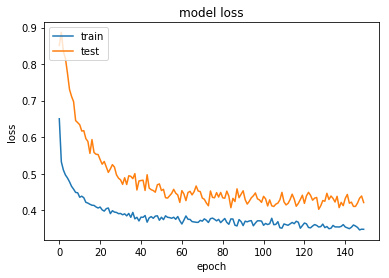

4542/4542 [==============================] - 0s 44us/step

acc: 89.70%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                180       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 55        
_________________________________________________________________
dropout_12 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Part 2 - build model the ANN!

# biuld model the ANN
n_input = X_train_res.shape[1]
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = (n_input)))
classifier.add(Dropout(p = 0.1))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train_res, y_train_res, batch_size =20, validation_split=0.2, nb_epoch = 150, verbose = 1)

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model on training set
scores = classifier.evaluate(X_train_res, y_train_res)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
#structure model
classifier.summary()


In [92]:
#save model training
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#evaluate the model on test set
loss_and_metrics = loaded_model.evaluate(X_test, y_test, batch_size = 20)
print("\nTest score: %.2f%%" % (loss_and_metrics[1]*100))

667/667 [==============================] - 1s 1ms/step

Test score: 91.15%


In [93]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
#from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)
print(classification_report(y_test, y_pred))

Confusion matrix
[[545  34]
 [ 25  63]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       579
           1       0.65      0.72      0.68        88

   micro avg       0.91      0.91      0.91       667
   macro avg       0.80      0.83      0.81       667
weighted avg       0.92      0.91      0.91       667



In [85]:
result = pd.DataFrame(X_test,columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17'])
result['y_Acu'] = y_test
result['y_Prec'] = y_pred
result

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,y_Acu,y_Prec
0,3.115578,-0.615795,-0.589441,1.555405,-0.468562,1.555239,-0.797331,0.744634,-0.796566,-0.051743,-1.365785,-0.050457,-0.334364,0.214190,-0.336336,-1.179680,-1.165467,0,False
1,-0.320968,1.623917,2.063541,-1.221982,0.824129,-1.221933,-0.863968,-0.903120,-0.863433,-0.466713,0.905695,-0.467614,-0.085515,-0.605667,-0.086163,0.338190,-0.274149,0,False
2,-0.320968,-0.615795,-0.589441,0.282897,-1.512659,0.282730,0.296305,0.395110,0.296370,1.159576,0.956173,1.161494,0.803234,-0.195738,0.809191,1.097125,-1.165467,0,False
3,-0.320968,-0.615795,-0.589441,-0.087790,-0.468562,-0.088283,0.839203,0.445042,0.838227,-2.478333,-0.255284,-2.478750,-0.974263,-1.015595,-0.968351,-0.420745,1.508488,0,False
4,3.115578,-0.615795,-0.589441,3.049218,-0.965751,3.049053,0.035635,0.295246,0.035818,0.321731,0.350445,0.322789,0.554384,1.443975,0.559019,-0.420745,-1.165467,1,True
5,3.115578,-0.615795,-0.589441,1.066688,-0.418843,1.067064,0.143431,0.944361,0.144189,-0.660366,-0.709580,-0.660823,1.905282,0.624118,1.902050,0.338190,-1.165467,1,True
6,3.115578,-0.615795,-0.589441,0.834317,0.525815,0.833825,-0.326950,-0.104209,-0.326188,-1.146475,2.319061,-1.148239,-0.121064,-1.425524,-0.125664,-1.179680,0.617169,1,True
7,-0.320968,-0.615795,-0.589441,-0.427126,-0.369124,-0.426751,0.278665,-1.602167,0.277924,0.436342,-1.163876,0.436958,-0.938713,0.624118,-0.942017,-0.420745,1.508488,0,False
8,-0.320968,-0.615795,-0.589441,0.572438,-1.214346,0.572380,-0.246593,-0.004345,-0.245486,-1.545637,0.098058,-1.543440,-1.969661,-0.195738,-1.969041,1.097125,-1.165467,0,False
9,-0.320968,-0.615795,-0.589441,1.492701,-0.766876,1.492318,-0.648377,0.145451,-0.648996,-0.452881,-0.457193,-0.454440,1.087633,0.214190,1.085698,1.097125,-1.165467,0,False


In [86]:
#Part 4 - Evaluatic consequent model

#evaluation model
#from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print("Accuracy: %f" %accuracy_score)
precision_score = metrics.precision_score(y_test, y_pred)
print("Precision: %f" %precision_score)
recall_score = metrics.recall_score(y_test, y_pred)
print("Recall: %f" %recall_score)
F1_score = metrics.f1_score(y_test, y_pred)
print("F1_score: %f" %F1_score)
Fbeta_score = metrics.fbeta_score(y_test, y_pred, beta=0.5) 
print("Fbta_score: %f" %Fbeta_score)

Accuracy: 0.949025
Precision: 0.806818
Recall: 0.806818
F1_score: 0.806818
Fbta_score: 0.806818


In [87]:
#roc_curve indicates the corresponding True Positive Rate and False Positive Rate on the coordinate axis
#from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
print('Thresholds:')
print(thresholds)

Thresholds:
[2 1 0]


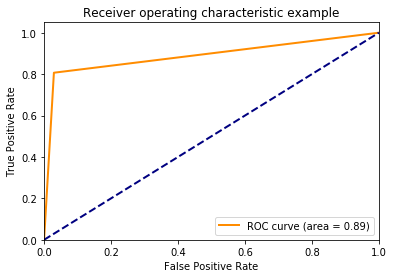

In [88]:
#import matplotlib.pyplot as plt
#from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [89]:
#Precision-Recall curve indicates the corresponding Precision and Recall on the coordinate axis
#from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

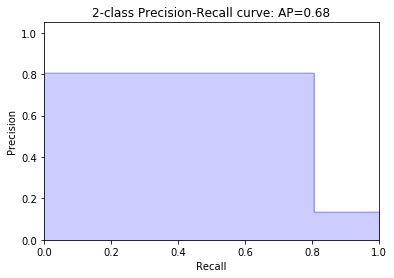

In [90]:
#from sklearn.metrics import precision_recall_curve
#import matplotlib.pyplot as plt
#from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))